# LIBS

In [1]:
# custom imports
from constants import DAYS, RANDOM_STATE

# scikit-learn import
from sklearn.model_selection import train_test_split

# standard Python imports
import os
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

# READ FILE

## - Dataframe

In [2]:
# Define the file path for the data file
file_path = '../dataset/stomach.csv'

# Specify data types (dtype) for each column
dtypes = {
    'Death (180 days)': bool,
    'Age': int,
    'Gender': int,
    'Advanced Staging': float,
    'CCI': float,
    'GDS-SF': float,
    'IPAQ-SF': float,
    'KATZ': float,
    'KPS': float,
    'MMSE': float,
    'MNA-SF': int,
    'Polypharmacy': float,
    'TUG': float,
    'Hemoglobin': float,
    'Leukocyte': float,
    'Granulocytes': float,
    'Platelet': float,
    'Creatinine': float,
}

# Read the Excel file and select only the desired columns with specified data types
df = pd.read_csv(
    file_path, 
    usecols=dtypes.keys(),
    dtype=dtypes
)

# VISUALIZE

## - Describe

In [3]:
df.describe()

,Age,Gender,CCI,GDS-SF,IPAQ-SF,KATZ,KPS,MMSE,MNA-SF,Polypharmacy,TUG,Hemoglobin,Leukocyte,Granulocytes,Platelet,Creatinine,Advanced Staging
count,182.000000,182.000000,180.000000,178.000000,177.000000,178.000000,180.000000,178.000000,182.000000,178.000000,178.000000,181.000000,182.000000,181.000000,181.000000,182.000000,182.000000
mean,75.857143,0.554945,2.672222,4.387640,3.333333,0.831461,74.444444,21.067416,8.582418,2.719101,1.735955,10.715470,7301.483516,4845.591160,287972.375691,1.822308,0.730769
std,7.652063,0.498343,2.804288,2.808636,0.816497,1.459324,16.451120,4.955845,2.954782,2.262386,0.825408,1.925727,3617.442168,3187.263065,125947.627164,8.503983,0.444784
min,63.000000,0.000000,0.000000,0.000000,1.000000,0.000000,30.000000,0.000000,2.000000,0.000000,0.000000,5.700000,2200.000000,1248.000000,47000.000000,0.480000,0.000000
25%,70.000000,0.000000,0.000000,2.250000,3.000000,0.000000,60.000000,18.000000,7.000000,1.000000,1.000000,9.500000,5100.000000,2862.000000,202000.000000,0.710000,0.000000
50%,75.000000,1.000000,1.000000,4.000000,4.000000,0.000000,80.000000,21.000000,8.000000,2.000000,2.000000,10.900000,6400.000000,3925.000000,260000.000000,0.810000,1.000000
75%,81.750000,1.000000,6.000000,6.000000,4.000000,1.000000,90.000000,25.000000,11.000000,4.000000,2.000000,12.000000,8300.000000,5796.000000,351000.000000,1.000000,1.000000
max,98.000000,1.000000,11.000000,13.000000,4.000000,6.000000,100.000000,30.000000,14.000000,11.000000,3.000000,15.700000,22100.000000,18808.000000,906000.000000,87.000000,1.000000


## - Head

In [4]:
df.head()

,Age,Gender,CCI,GDS-SF,IPAQ-SF,KATZ,KPS,MMSE,MNA-SF,Polypharmacy,TUG,Hemoglobin,Leukocyte,Granulocytes,Platelet,Creatinine,Advanced Staging,Death (180 days)
0,83,0,8.0,5.0,4.0,1.0,70.0,18.0,5,6.0,2.0,11.2,3500.0,3500.0,165000.0,0.57,1.0,False
1,68,0,2.0,3.0,4.0,0.0,80.0,25.0,7,1.0,1.0,12.8,2200.0,1579.0,193000.0,0.48,1.0,False
2,76,1,6.0,6.0,4.0,2.0,50.0,16.0,8,1.0,3.0,10.9,3700.0,2220.0,246000.0,0.49,1.0,False
3,79,1,0.0,10.0,4.0,0.0,90.0,21.0,4,2.0,1.0,11.6,5500.0,4246.0,300000.0,1.25,1.0,False
4,71,0,0.0,3.0,NaN,0.0,90.0,24.0,6,3.0,1.0,12.2,7800.0,5803.0,300000.0,0.68,0.0,False


## - Info

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 182 entries, 0 to 181
Data columns (total 18 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Age               182 non-null    int64  
 1   Gender            182 non-null    int64  
 2   CCI               180 non-null    float64
 3   GDS-SF            178 non-null    float64
 4   IPAQ-SF           177 non-null    float64
 5   KATZ              178 non-null    float64
 6   KPS               180 non-null    float64
 7   MMSE              178 non-null    float64
 8   MNA-SF            182 non-null    int64  
 9   Polypharmacy      178 non-null    float64
 10  TUG               178 non-null    float64
 11  Hemoglobin        181 non-null    float64
 12  Leukocyte         182 non-null    float64
 13  Granulocytes      181 non-null    float64
 14  Platelet          181 non-null    float64
 15  Creatinine        182 non-null    float64
 16  Advanced Staging  182 non-null    float64
 1

# VARIABLES

## - Output

The target is the ML model's output variable, representing the outcome it seeks to predict or classify using the input variables, or features.

In [6]:
y = df[f'Death ({DAYS} days)'] 

The code below generates a visualization that demonstrates the distribution of different exit conditions.

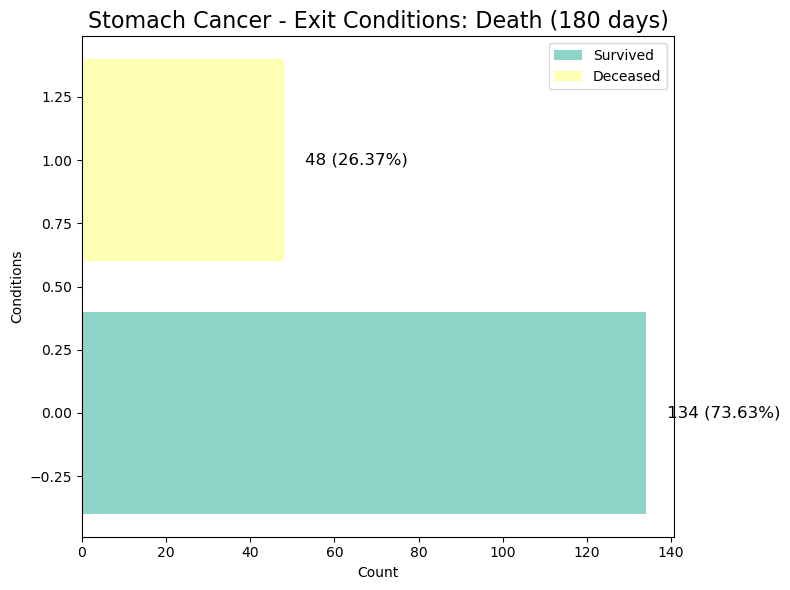

In [7]:
# Get unique value counts
counts = y.value_counts()

# Calculate percentages
percentages = (counts / counts.sum()) * 100

# Create a figure with a custom size and white background
fig, ax = plt.subplots(figsize=(8, 6), facecolor='white')

# Create horizontal bar chart
colors = plt.cm.Set3.colors  # You can choose a different colormap
bars = ax.barh(counts.index, counts.values, color=colors)

# Add data labels to the bars
for index, (value, percentage) in enumerate(zip(counts.values, percentages)):
    ax.text(value + 5, index, f"{value:,d} ({percentage:.2f}%)", va='center', fontsize=12)

# Add title and adjust layout
plt.title(f"Stomach Cancer - Exit Conditions: Death ({DAYS} days)", fontsize=16)
plt.xlabel("Count")
plt.ylabel("Conditions")

# Create legend
legend_labels = ['Survived', 'Deceased']
plt.legend(bars, legend_labels)

plt.tight_layout()

# Display chart
plt.show()

## - Inputs

Features, also called input variables, are the data used by a ML model to make predictions or classifications regarding the target (output variable)."

In [8]:
X = df.drop(columns=[f'Death ({DAYS} days)'],axis=1) 

### Correlation

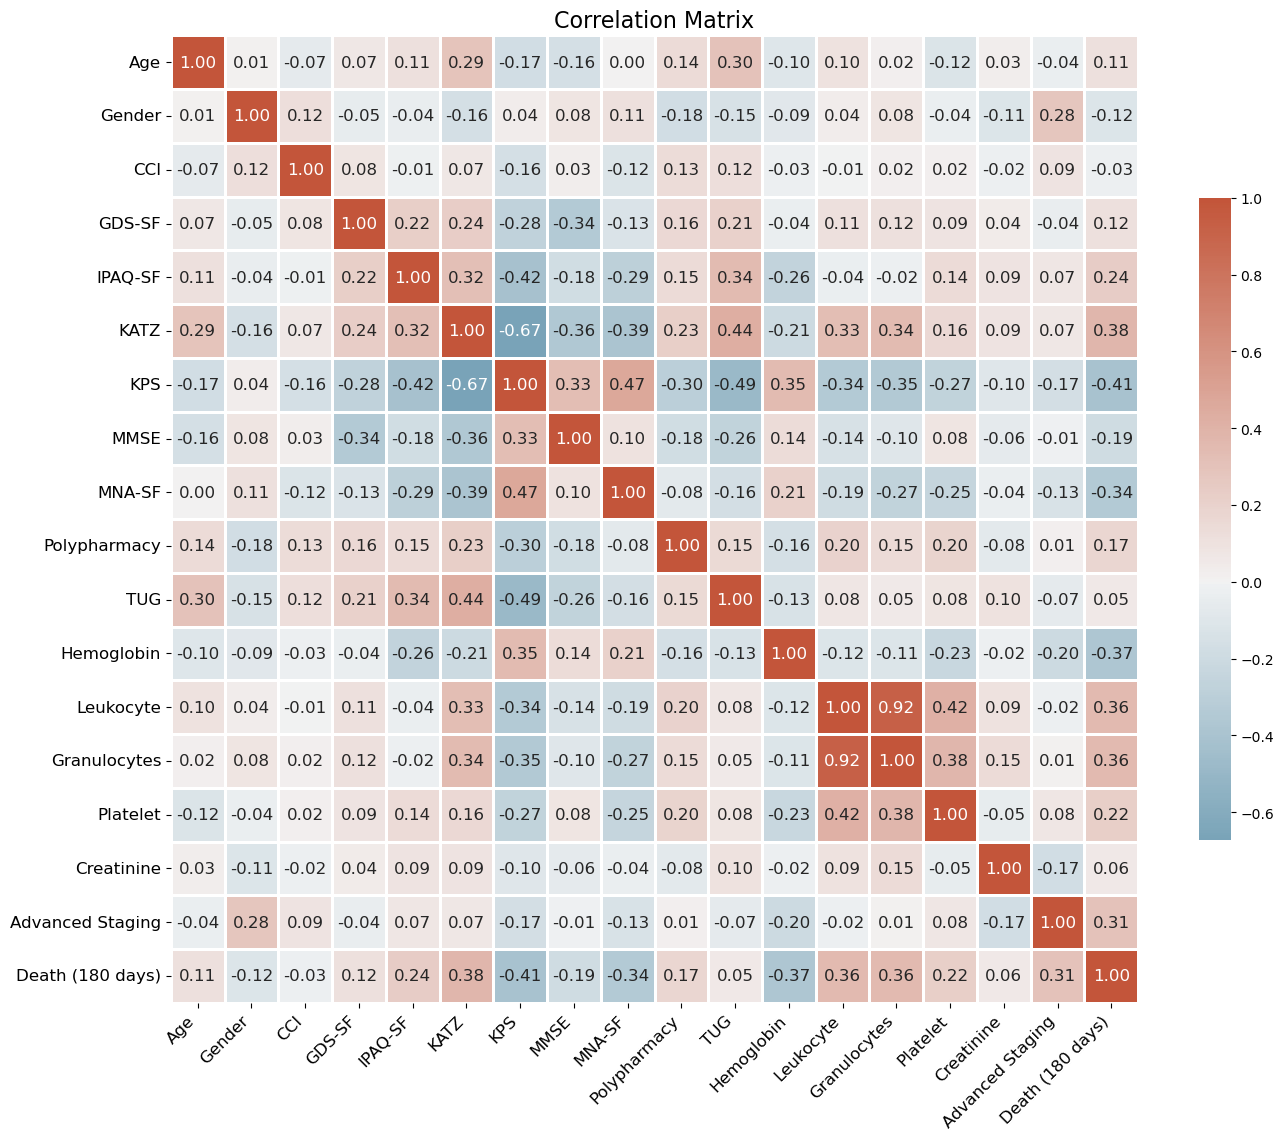

In [9]:
# Concatenate features and target variable
data = pd.concat([X, y], axis=1)

# Compute the correlation matrix
corr = data.corr()

# Set up the matplotlib figure with a larger size
plt.figure(figsize=(14, 12))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(230, 20, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, cmap=cmap, center=0, annot=True, fmt='.2f', square=True,
            linewidths=1, cbar_kws={"shrink": 0.6}, annot_kws={"fontsize": 12})

# Customize tick labels for better readability
plt.xticks(rotation=45, horizontalalignment='right', fontsize=12)
plt.yticks(fontsize=12)

# Add a title
plt.title("Correlation Matrix", fontsize=16)

# Automatically adjust the layout to avoid clipping the labels
plt.tight_layout()

plt.show()

In [10]:
# Identify highly correlated variables
highly_correlated = set()
for i in range(len(corr.columns)):
    for j in range(i+1, len(corr.columns)):
        if abs(corr.iloc[i, j]) > 0.8:
            highly_correlated.add((corr.columns[i],corr.columns[j]))
                
# Print highly correlated variables
print(f"Highly correlated variables to be potentially removed: {highly_correlated}")

Highly correlated variables to be potentially removed: {('Leukocyte', 'Granulocytes')}


In [11]:
# Removing correlated features:
X.drop('Granulocytes',axis=1,inplace=True)

### Outliers

Outliers are values that are far from the other values in a dataset. They can be either very high or very low values in relation to the overall distribution of the data. Outliers can be caused by measurement errors, data entry errors, or they may be true extreme values that represent rare or extreme events in the real world. The presence of outliers can affect statistical analysis and lead to misleading conclusions if not treated correctly.

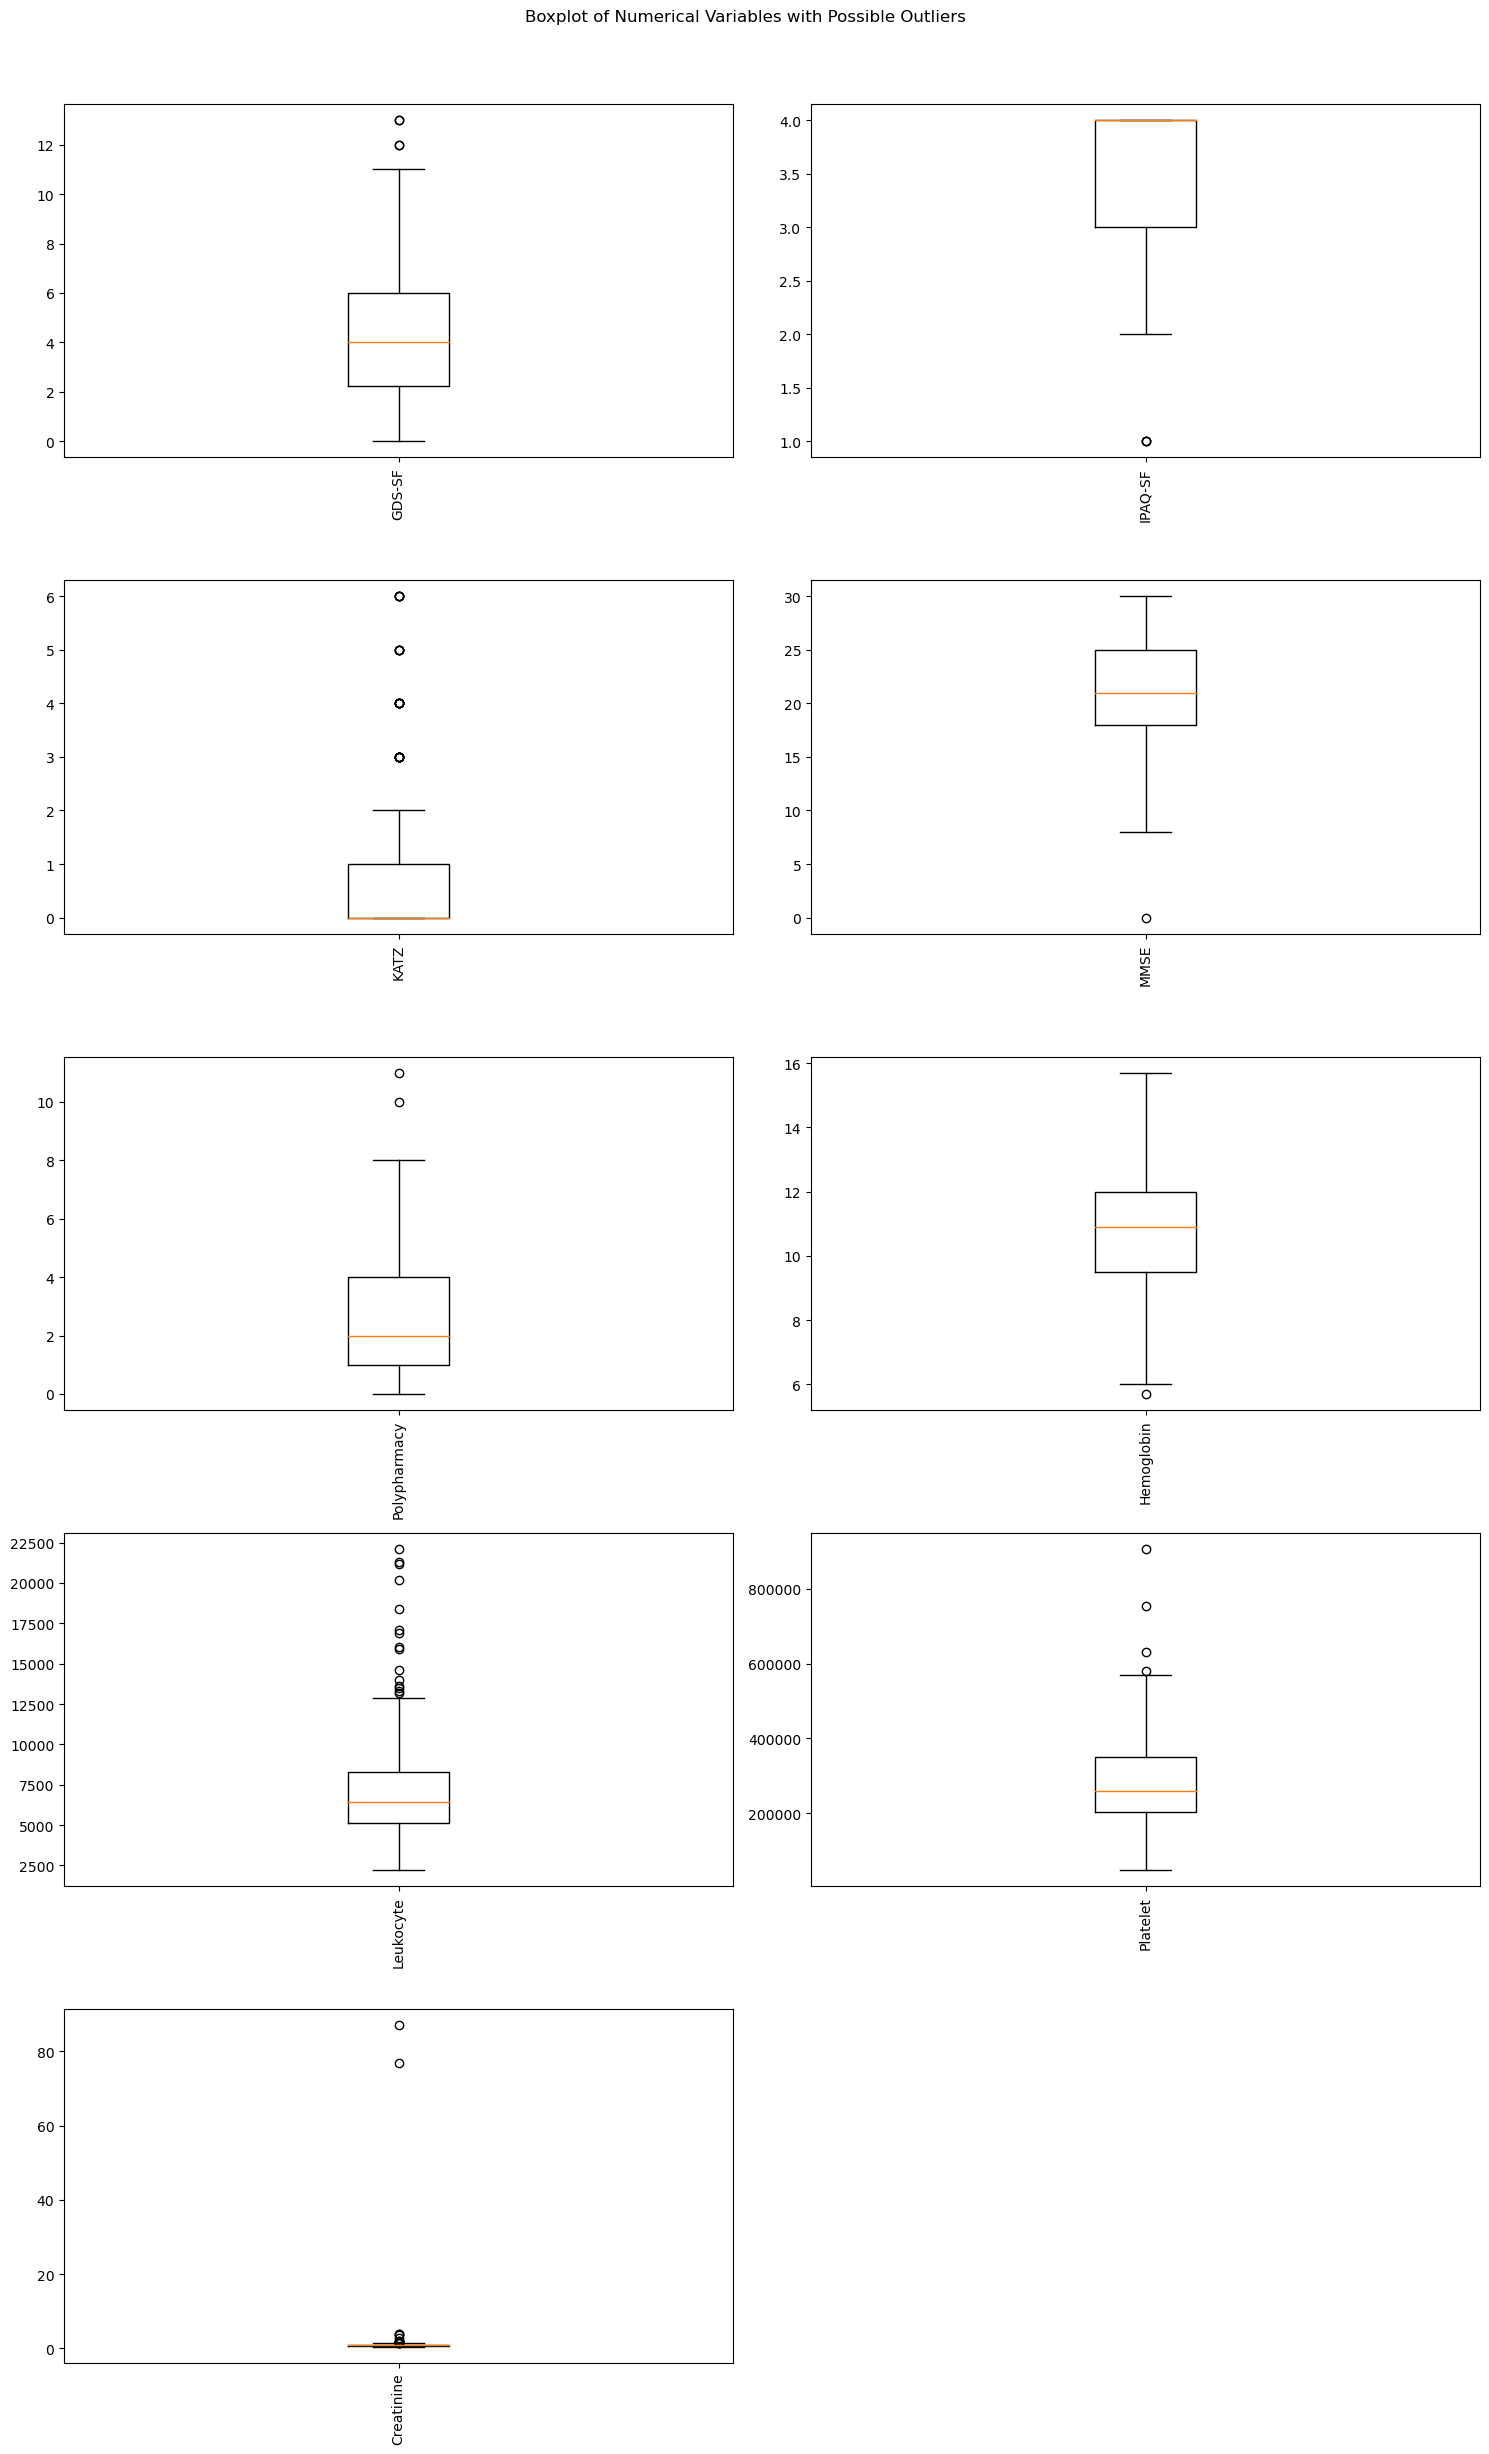

In [12]:
# Filter the DataFrame to select only numeric columns
numeric_columns = X.select_dtypes(include=['number'])

# Find the values that have outliers in the numeric columns
q1 = numeric_columns.quantile(0.25)
q3 = numeric_columns.quantile(0.75)
iqr = q3 - q1
outliers = ((numeric_columns < (q1 - 1.5 * iqr)) | (numeric_columns > (q3 + 1.5 * iqr)))

# Create a new DataFrame with only the columns that have outliers
X_outliers = numeric_columns.loc[:, outliers.any() & (numeric_columns.nunique() > 2)]

# Calculate the number of rows and columns for subplots
num_vars_per_row = 2
num_cols = min(len(X_outliers.columns), num_vars_per_row)
num_rows = int(np.ceil(len(X_outliers.columns) / num_cols))

# Increase the figure height
fig, axs = plt.subplots(nrows=num_rows, ncols=num_cols, figsize=(15, num_rows * 5))

# Flatten the axes for easier iteration
axs = axs.flatten()

for i, col in enumerate(X_outliers.columns):
    if i < len(axs):
        axs[i].boxplot(X_outliers[col].dropna())
        axs[i].set_xticklabels([col], rotation='vertical')  # Set names on the bottom and vertical

# Remove empty subplots
for i in range(len(X_outliers.columns), len(axs)):
    axs[i].remove()

# Set the general title for the plot
fig.suptitle('Boxplot of Numerical Variables with Possible Outliers')

# Adjust the spacing between the subplots
plt.tight_layout(rect=[0, 0, 1, 0.96])  # Adjust the rectangle to fit the suptitle
plt.show()

In [13]:
X['Creatinine'] = X['Creatinine'].apply(lambda x: None if x >= 10 else x)

### Null Values

The graph below illustrates the percentage of missing values across different variables, providing insights into the completeness of the data and guiding decisions on how to handle missing values effectively in subsequent analyses.

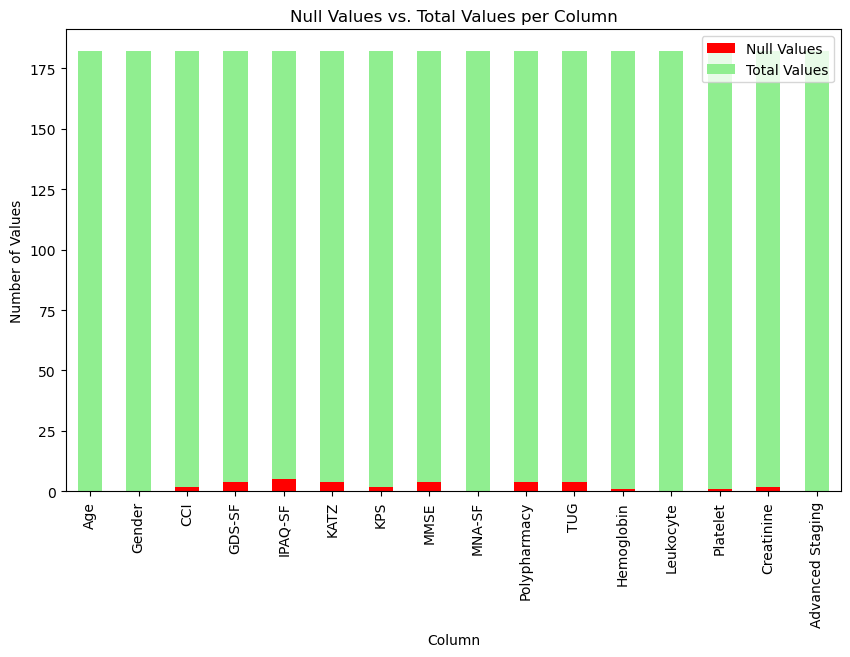

In [14]:
# Calculate the number of null values in each column
null_values_per_column = X.isnull().sum()

# Calculate the total number of values in each column
total_values_per_column = X.count()

# Create a DataFrame to store both null and non-null values
data = pd.DataFrame({'Null Values': null_values_per_column, 'Total Values': total_values_per_column})

# Create a stacked bar chart with labels inside the bars
plt.figure(figsize=(10, 6))
ax = data.plot(kind='bar', stacked=True, color=['red', 'lightgreen'], ax=plt.gca())
plt.title('Null Values vs. Total Values per Column')
plt.xlabel('Column')
plt.ylabel('Number of Values')
plt.legend(loc='upper right', labels=['Null Values', 'Total Values'])

plt.show()

The following are the patterns with missing values.

In [15]:
X[X.isnull().sum(axis=1) > 2]

,Age,Gender,CCI,GDS-SF,IPAQ-SF,KATZ,KPS,MMSE,MNA-SF,Polypharmacy,TUG,Hemoglobin,Leukocyte,Platelet,Creatinine,Advanced Staging
46,86,1,0.0,NaN,NaN,NaN,80.0,NaN,8,NaN,NaN,11.1,6400.0,287000.0,0.92,1.0
47,67,0,0.0,NaN,NaN,NaN,100.0,NaN,13,NaN,NaN,13.6,8300.0,372000.0,0.60,1.0
48,81,1,0.0,NaN,NaN,NaN,90.0,NaN,9,NaN,NaN,9.7,5800.0,177000.0,0.70,1.0
97,69,0,3.0,NaN,NaN,NaN,80.0,NaN,13,NaN,NaN,12.5,5500.0,240000.0,1.00,0.0


Patterns with more than one missing value will be excluded

In [16]:
# Combine X and y into a single DataFrame for easier filtering
data = pd.concat([X, y], axis=1)

# Filter instances with more than two null value in X
filtered_data = data[data[X.columns].isnull().sum(axis=1) <= 2]

# Separate X and y again
X = filtered_data.drop(columns=[y.name])
y = filtered_data[y.name]

# Display the resulting count after exclusion
print("Number of records after exclusion:", len(filtered_data))

Number of records after exclusion: 178


# DATA DIVISION

The importance of dividing data into training and testing subsets lies in the ability to assess a machine learning model's performance on unseen data. By using a portion of the available data for training, we can build a model that learns the underlying patterns in the data. Then, by evaluating the model's performance on a separate set of testing data, we can obtain an estimate of its ability to generalize to new, unseen data.

In [17]:
# Splitting the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, 
                                                    y, 
                                                    test_size=0.25, 
                                                    stratify=y, 
                                                    random_state=RANDOM_STATE)

# SAVE

In [18]:
# Define the directory path
directory = '../dataset/'

# Save data splits into CSV files within the directory
X_train.to_csv(f'{directory}/X_train.csv')
X_test.to_csv(f'{directory}/X_test.csv')
y_train.to_csv(f'{directory}/y_train.csv')
y_test.to_csv(f'{directory}/y_test.csv')